In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join, isdir
from tqdm import tqdm

In [128]:
dfd = pd.read_pickle('/home/icb/manuel.gander/Atl/data/Synched_aucs.pkl')
dfd = dfd.drop_duplicates(['PubChem_CID', 'Dr_repr_name']).copy()
D_dr_rep = dict(zip(dfd['PubChem_CID'], dfd['Dr_repr_name']))

In [129]:
D_s_m = {'GDSC1':'GDSC_v1', 'GDSC2':'GDSC_v2', 'CTD2':'CTRP_v2', 'CTPR':'CTRP_v1', 'MR_NCI60':'NCI_60', 'PRISM2':'PRISM2', 'DTP':'DTP'}

In [130]:
datasets = ['atlantic', 'atl_only_phos', 'atl_only_full', 'Gygi', 'kinase_scores', 'RNA', 'drug_scores', 'atl_full_and_kinases', 'identity']

In [131]:
mypath='/home/icb/manuel.gander/Atl/data/dones_comb0'
keys=listdir(mypath)
if '.ipynb_checkpoints' in keys:
    keys.remove('.ipynb_checkpoints')
len(keys)

294

In [132]:
7*7*6

294

In [133]:
# Check if there are keys missing

In [134]:
datasets = ['atlantic', 'atl_only_phos', 'atl_only_full', 'Gygi', 'kinase_scores', 'RNA', 'drug_scores', 'identity']

sources=['CTD2', 'GDSC1', 'GDSC2', 'DTP', 'CTPR', 'MR_NCI60']


alphas = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]
l1_ratios = [0.01, 0.03, 0.1, 0.3, 0.5, 0.9, 0.99]

In [135]:
frames = []
for k in tqdm(keys):
    df = pd.read_pickle(mypath+'/'+k)
    frames.append(df.groupby(['PubChem_CID', 'alpha', 'l1_ratio', 'dataset', 'source0', 'source1']).mean().reset_index())
Df = pd.concat(frames, ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████████| 294/294 [00:16<00:00, 17.31it/s]


In [136]:
#df = Df.groupby(['PubChem_CID', 'alpha', 'l1_ratio', 'dataset', 'source']).mean().reset_index()
df = Df.copy()
df = df[np.isfinite(df['pearsons'])]
df['drug_repr'] = df['PubChem_CID'].map(D_dr_rep)
df['RMSE_ratio'] = df['RMSE']/df['RMSE_mean_model']
df.sort_values('pearsons')

,PubChem_CID,alpha,l1_ratio,dataset,source0,source1,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,td,ind,n_ccls,kn,drug_repr,RMSE_ratio
7382,300471,0.30,0.50,RNA,GDSC2,GDSC1,-0.264876,-0.282460,1.005344,0.206829,0.205378,0.678860,49.5,699.0,1.000000e+09,elesclomol,1.007066
22659,445063,1.00,0.10,RNA,GDSC2,GDSC1,-0.252534,-0.075794,1.000008,0.108815,0.108814,0.292614,49.5,337.0,1.000000e+09,nan,1.000008
16841,445063,0.10,0.99,RNA,GDSC2,GDSC1,-0.252534,-0.075794,1.000017,0.108816,0.108814,0.246320,49.5,337.0,1.000000e+09,nan,1.000016
11232,445063,10.00,0.01,RNA,GDSC2,GDSC1,-0.252534,-0.075794,1.000005,0.108814,0.108814,0.305271,49.5,337.0,1.000000e+09,nan,1.000005
3716,10077147,0.10,0.90,RNA,GDSC2,GDSC2,-0.195110,-0.212874,1.000003,0.065745,0.065745,0.122571,49.5,113.0,1.000000e+09,BX795,1.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,131634760,0.10,0.30,RNA,GDSC2,DTP,0.728709,0.604929,0.670554,0.158336,0.227527,1.798450,49.5,526.0,1.000000e+09,AZD5991,0.695901
12025,131634760,0.03,0.99,RNA,GDSC2,GDSC2,0.729008,0.606093,0.664988,0.157252,0.227506,1.131968,49.5,485.0,1.000000e+09,AZD5991,0.691197
12771,131634760,0.03,0.90,RNA,GDSC2,GDSC2,0.730804,0.606569,0.664175,0.156611,0.227506,1.067454,49.5,485.0,1.000000e+09,AZD5991,0.688384
5108,131634760,0.03,0.99,RNA,GDSC2,DTP,0.730816,0.606228,0.668720,0.157752,0.227527,0.955750,49.5,526.0,1.000000e+09,AZD5991,0.693333


<Axes: xlabel='RMSE_ratio', ylabel='pearsons'>

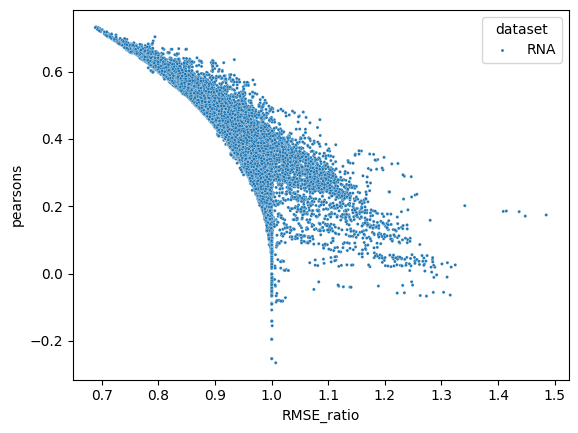

In [137]:
sns.scatterplot(data=df, x='RMSE_ratio', y='pearsons', s=5, hue='dataset')

In [138]:
# Pick the one with the best l1_ratio and alpha
crit = 'RMSE_ratio'
crit = 'pearsons'

alphas = sorted(set(df['alpha']))
l1_ratios = sorted(set(df['l1_ratio']))
datas = sorted(set(df['dataset']))
sources1 = sorted(set(df['source1']))


frames = []
for source1 in sources1:
    for data in datas:
        dfs = df[(df['source1']==source1)&(df['dataset']==data)].copy()
        drugs = sorted(set(dfs['PubChem_CID']))
        for d in drugs:
            dfss = dfs[dfs['PubChem_CID']==d].copy()
            if crit=='RMSE_ratio':
                frames.append(dfss.sort_values(crit).iloc[:1])
            else:
                frames.append(dfss.sort_values(crit).iloc[-1:])
dfm = pd.concat(frames, ignore_index=True)
dfm.sort_values('pearsons')

,PubChem_CID,alpha,l1_ratio,dataset,source0,source1,pearsons,spearmans,l1_ratios,RMSE,RMSE_mean_model,td,ind,n_ccls,kn,drug_repr,RMSE_ratio
357,445063,0.01,0.01,RNA,GDSC2,GDSC2,-0.024308,-0.049120,1.372234,0.110713,0.088767,2.843069,49.5,260.0,1.000000e+09,nan,1.247241
197,992586,1.00,0.01,RNA,GDSC2,DTP,0.041501,0.041673,1.006515,0.070657,0.069898,0.696031,49.5,558.0,1.000000e+09,UMI-77,1.010859
416,992586,0.03,0.03,RNA,GDSC2,GDSC2,0.051695,0.071870,1.188470,0.082899,0.069836,4.059673,49.5,517.0,1.000000e+09,UMI-77,1.187041
62,10077147,0.03,0.30,RNA,GDSC2,CTPR,0.110371,0.113084,1.107541,0.070900,0.066169,0.594742,49.5,251.0,1.000000e+09,BX795,1.071495
253,445063,0.03,0.99,RNA,GDSC2,GDSC1,0.111123,0.128880,0.957937,0.108407,0.108814,0.342191,49.5,337.0,1.000000e+09,nan,0.996263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,11707110,1.00,0.01,RNA,GDSC2,DTP,0.709584,0.703505,0.666338,0.124149,0.175755,3.191626,49.5,669.0,1.000000e+09,trametinib,0.706375
349,397888,0.03,0.90,RNA,GDSC2,GDSC2,0.711089,0.668873,0.714189,0.153769,0.217560,0.852029,49.5,490.0,1.000000e+09,LMP744,0.706787
298,11707110,1.00,0.01,RNA,GDSC2,GDSC2,0.712193,0.707832,0.664562,0.123725,0.175668,3.514617,49.5,627.0,1.000000e+09,trametinib,0.704314
306,131634760,0.03,0.90,RNA,GDSC2,GDSC2,0.730804,0.606569,0.664175,0.156611,0.227506,1.067454,49.5,485.0,1.000000e+09,AZD5991,0.688384


In [144]:
frames2 = []

for source1 in sources1:
    dfms = dfm[dfm['source1'].isin(['GDSC2', source1])].copy()
    vc = dfms['PubChem_CID'].value_counts()
    dr_kept = list(vc[vc>1].index)
    dfmss = dfms[dfms['PubChem_CID'].isin(dr_kept)].copy()
    dfmss['comparison'] = source1
    dfmss['Comp'] = ['+other' if a!='GDSC2' else 'Only GDSC_v2' for a in dfmss['source1']]
    frames2.append(dfmss)
dfmn = pd.concat(frames2, ignore_index=True)
dfmn['Comp'] = dfmn['Comp'].astype('category')
custom_order = ['Only GDSC_v2', '+other']
custom_dtype = pd.CategoricalDtype(categories=custom_order, ordered=True)
dfmn['Comp'] = dfmn['Comp'].astype('category').astype(custom_dtype)
D_s_m = {'GDSC1':'GDSC_v1', 'GDSC2':'GDSC_v2', 'CTD2':'CTRP_v2', 'CTPR':'CTRP_v1', 'MR_NCI60':'NCI_60', 'PRISM2':'PRISM2', 'DTP':'DTP', 'NCI60':'NCI_60'}
dfmn['Comparison'] = dfmn['comparison'].map(D_s_m)

In [146]:
dfmn['Training data'] = dfmn['Comp']

(0.1, 0.75)

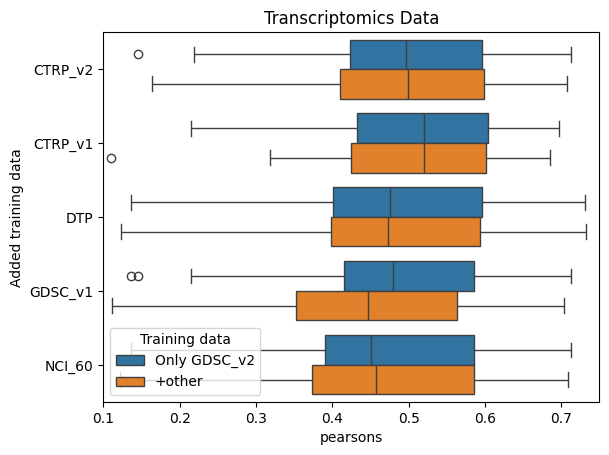

In [151]:
sns.boxplot(data=dfmn, x='pearsons', y='Comparison', hue='Training data')
plt.title('Transcriptomics Data')
plt.ylabel('Added training data')
plt.xlim(0.1,0.75)

Text(0, 0.5, 'Added training data')

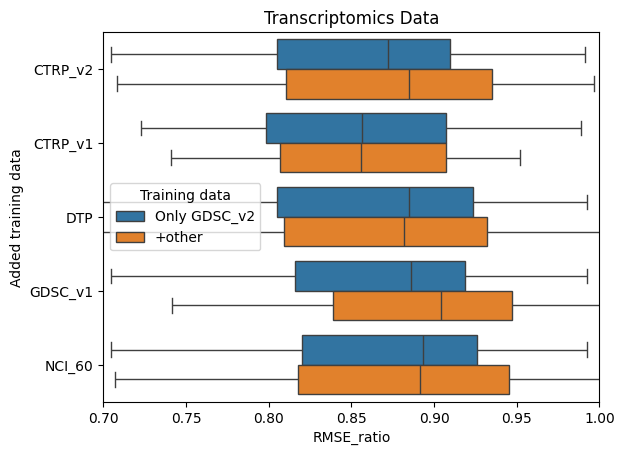

In [152]:
sns.boxplot(data=dfmn, x='RMSE_ratio', y='Comparison', hue='Training data')
plt.xlim(0.7,1.0)
plt.title('Transcriptomics Data')
plt.ylabel('Added training data')